In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from tabulate import tabulate

In [2]:
# Loading the dataset
df = pd.read_csv("/content/ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Statistical Analysis

In [3]:
# Here is the description of each numeric column 
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [4]:
# Here is the information of the each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
 # Here is the dataset shape 
 print("Dataset shape:", df.shape)

Dataset shape: (607, 12)


# Data Explorations

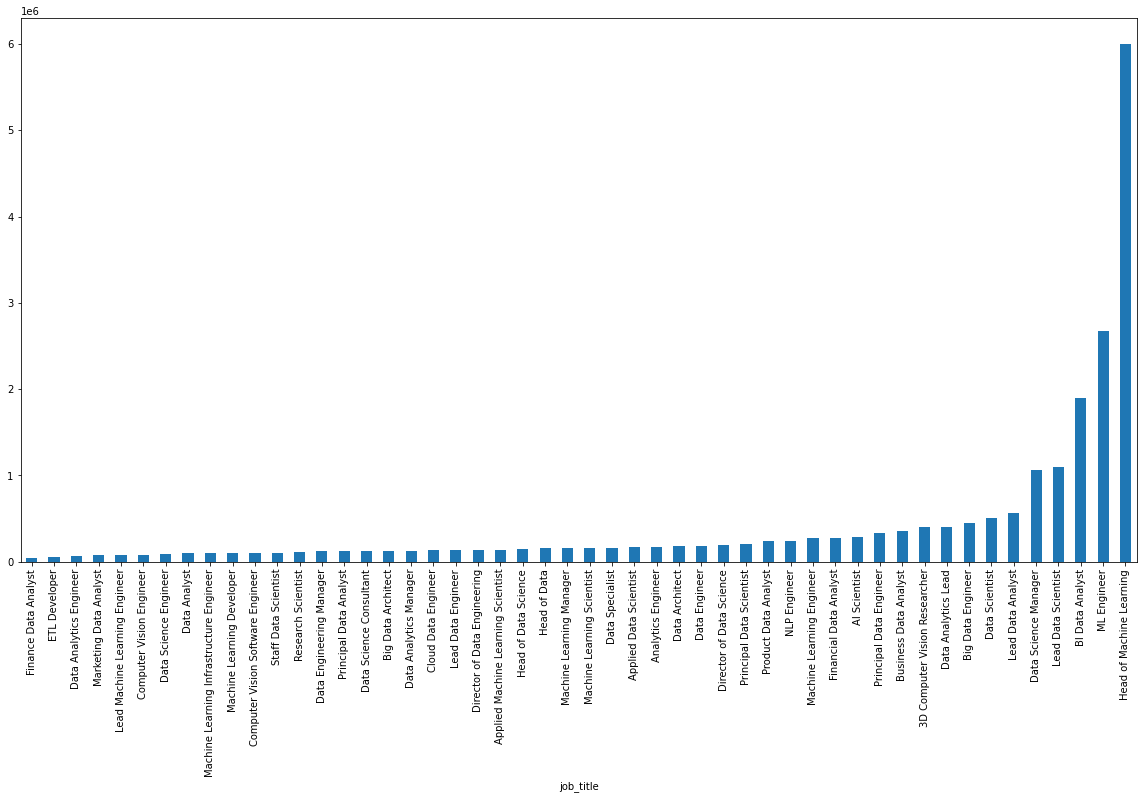

In [6]:
# Salary rates according to the job_title
df.groupby('job_title').mean()['salary'].sort_values().plot(kind='bar', figsize=(20,10))

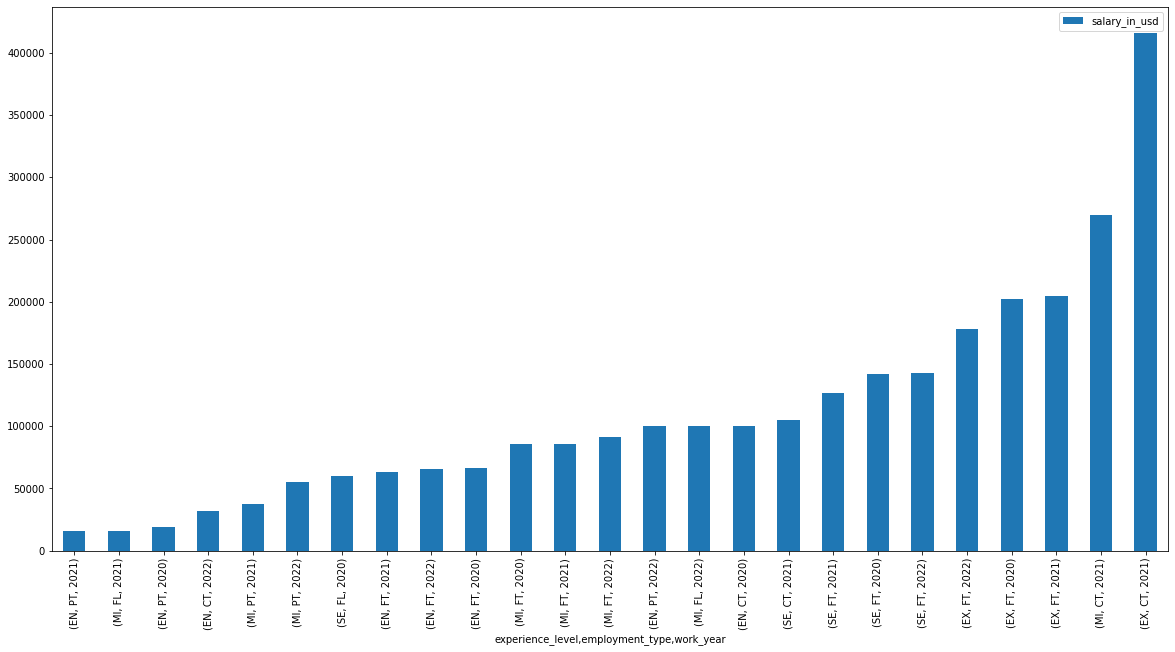

In [7]:
# Salary ranges in usd according to the employee type working year and experience level
df.groupby(['experience_level', 'employment_type', 'work_year']).mean()['salary_in_usd'].sort_values().plot(kind ='bar', figsize=(20,10), legend=True)

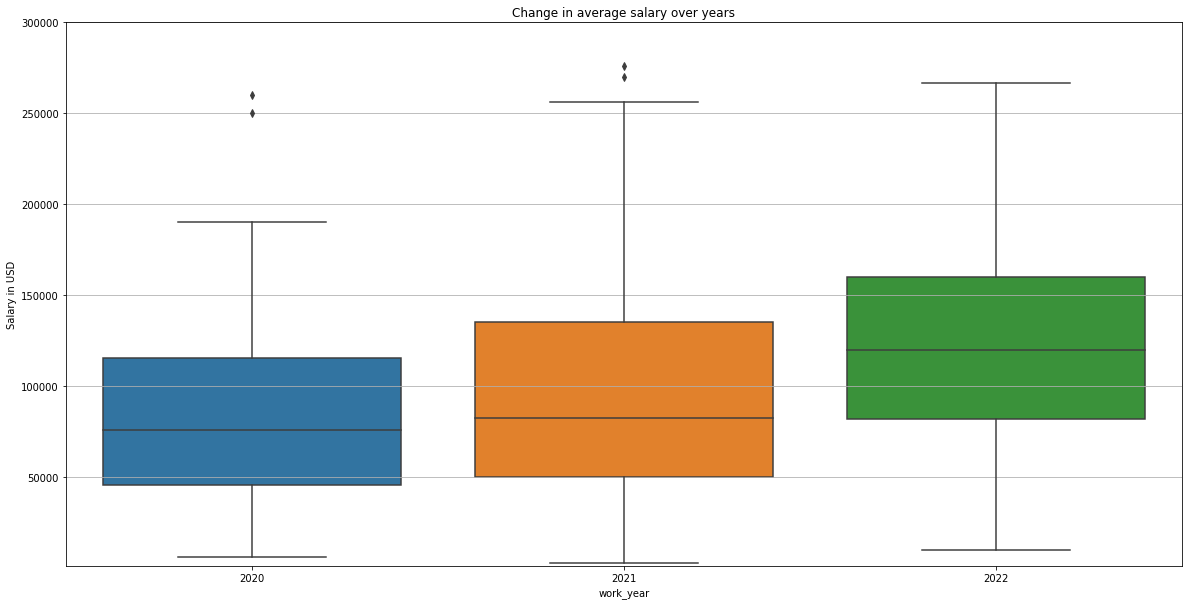

In [8]:
# changes in the salary over the years
fig, ax = plt.subplots(1,1,figsize =(20,10))

sns.boxplot(data =df,x = 'work_year', y= 'salary_in_usd')
plt.grid(axis  = 'y')
plt.ylim(1000,300000)
plt.title("Change in average salary over years")
plt.ylabel('Salary in USD')
plt.show()

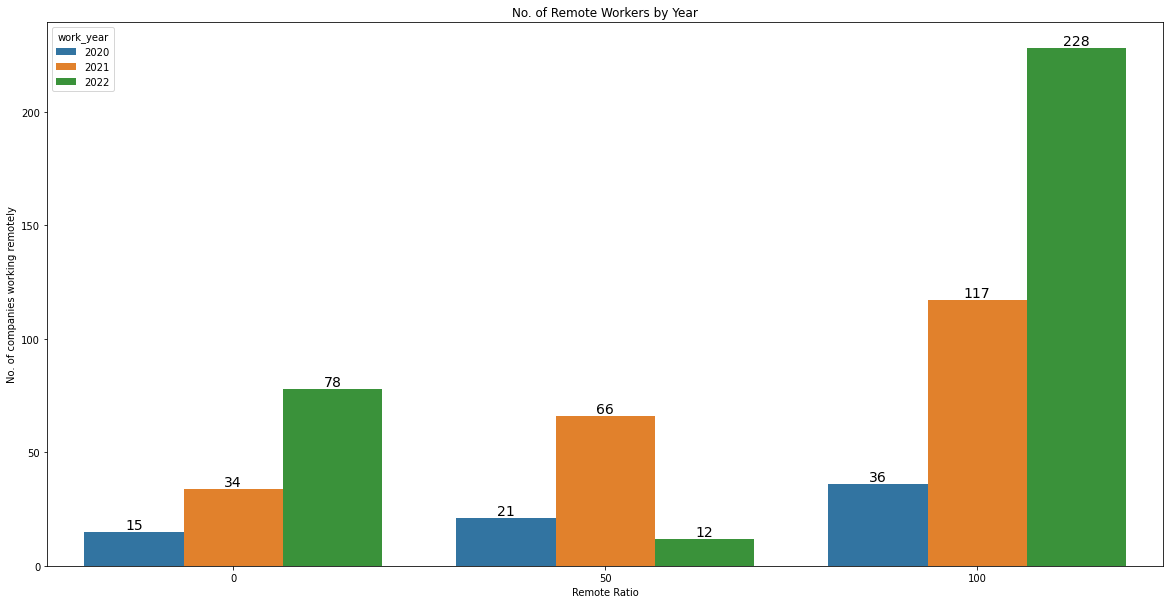

In [9]:
# Remote workers growth over the years
fig, ax = plt.subplots(figsize = (20,10))

remote_df = df.groupby(['work_year','remote_ratio']). agg(count = ('remote_ratio','count'))

remote_df = remote_df.reset_index()
splot= sns.barplot(x= 'remote_ratio', y = 'count', data = remote_df, hue = 'work_year')
plt.xlabel("Remote Ratio")
plt.ylabel("No. of companies working remotely")
plt.title("No. of Remote Workers by Year")

for p in splot.patches:
    splot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   size=14,
                   xytext=(0, 7),
                   textcoords='offset points')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


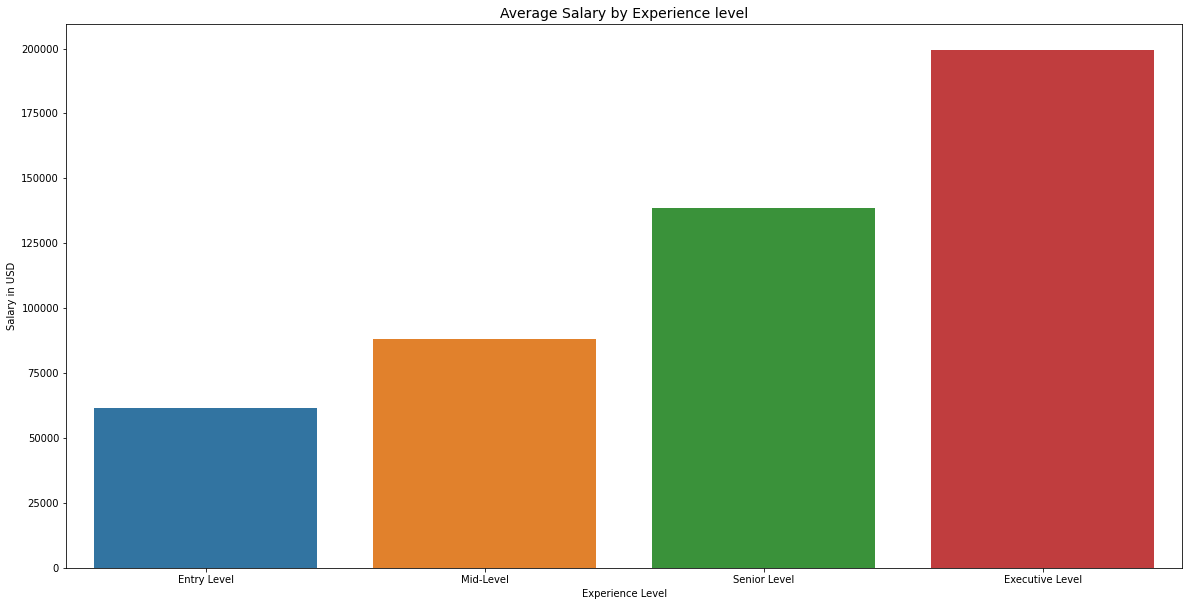

In [10]:
# Average salary of according to the experience level
fig, ax = plt.subplots(figsize = (20,10))

order_list = ['EN', 'MI', 'SE','EX']


bplot = sns.barplot(df['experience_level'], df['salary_in_usd'], ci = False, order=order_list)

plt.xticks(ticks = [0,1,2,3], labels = ['Entry Level','Mid-Level','Senior Level', 'Executive Level'])
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.title('Average Salary by Experience level', size = 14)

plt.show()

# Preprocessing

In [11]:
# Number of unique value in each column
df.nunique()

Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [12]:
# Dropping the first column as it have no column name
df = df.drop(df.columns[0], axis = 1)

In [13]:
# Seperating the features and the target columns
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
# Here is the features and the target column shape
print("Features shape:", X.shape)
print("Target column shape:", y.shape)

Features shape: (607, 10)
Target column shape: (607,)


In [15]:
# Extracting the object type columns
obj_col = []
for col in X.columns:
  if df[col].dtype == object:
    obj_col.append(col)

obj_col

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location']

In [16]:
# Converting the object type values into numeric values
print("Before Label Encoding.....")
display(X.head())
for col in obj_col:
  le = LabelEncoder()
  X[col] = le.fit_transform(X[col])

le = LabelEncoder()
y = le.fit_transform(y)

print("After Label Encoding.....")
display(X.head())

Before Label Encoding.....


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US


After Label Encoding.....


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location
0,2020,2,2,22,70000,7,79833,14,0,12
1,2020,3,2,41,260000,16,260000,32,0,29
2,2020,3,2,7,85000,8,109024,20,50,18
3,2020,2,2,47,20000,16,20000,23,0,20
4,2020,3,2,38,150000,16,150000,55,50,48


In [17]:
# Classes division
pd.Series(y).value_counts()

1    326
0    198
2     83
dtype: int64

In [18]:
# Balancing the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
pd.Series(y).value_counts()

0    326
2    326
1    326
dtype: int64

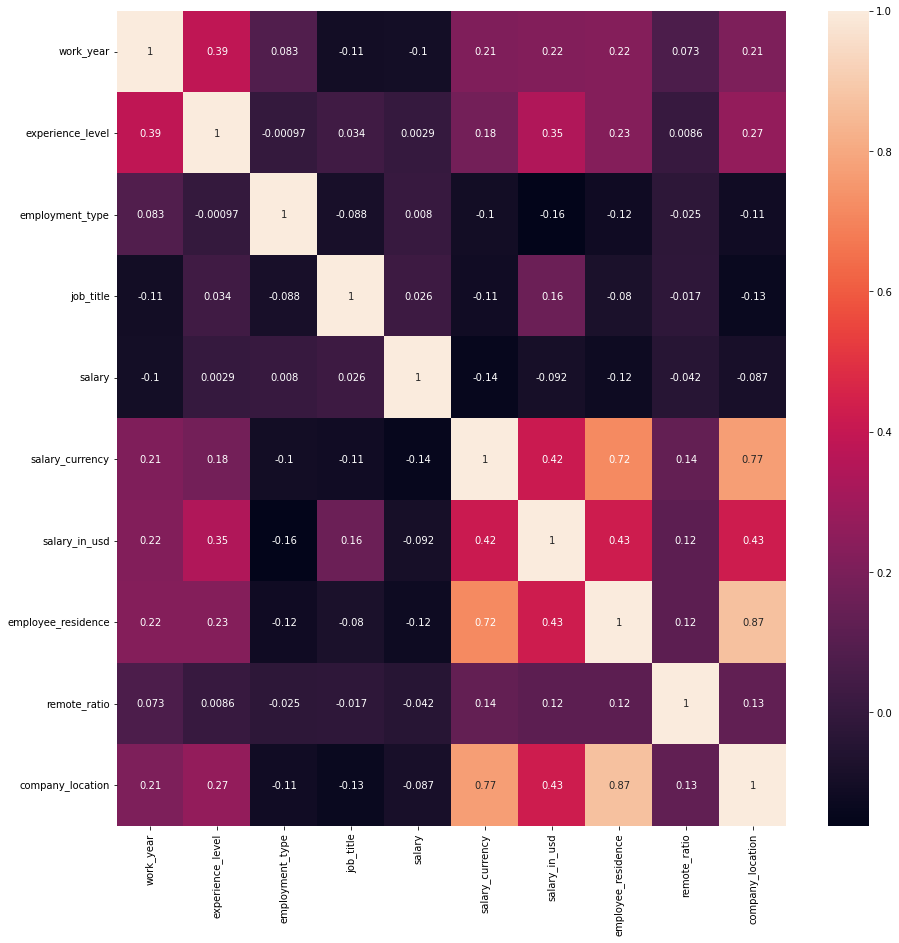

In [19]:
# Effects of the correlation all the columns over each other
plt.figure(figsize = (15,15))
sns.heatmap(X.corr(), annot= True)

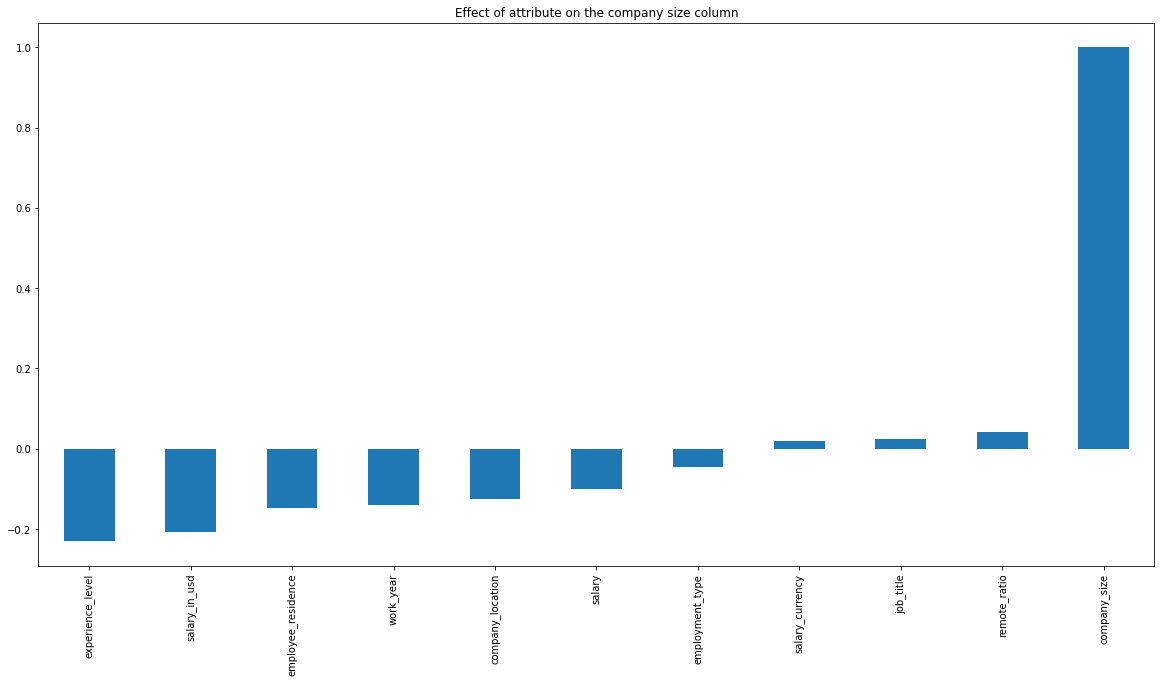

In [32]:
copy = X.copy()
copy['company_size'] = y
copy.corr()['company_size'].sort_values().plot(kind='bar', figsize=(20,10), title="Effect of attribute on the company size column")

In [20]:
# Spliting the dataset into train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Displaying the train and test data shape
print("Train data:", X_train.shape)
print("Test data:", X_test.shape)

Train data: (655, 10)
Test data: (323, 10)


# Applying the model for the classification

In [21]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    plt.figure(figsize=(10,10))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

========== Decision tree ==========

Accuracy on validation set: 0.6966

Classification report : 
               precision    recall  f1-score   support

           0       0.59      0.61      0.60        92
           1       0.75      0.73      0.74       130
           2       0.73      0.73      0.73       101

    accuracy                           0.70       323
   macro avg       0.69      0.69      0.69       323
weighted avg       0.70      0.70      0.70       323


Confusion Matrix : 
 [[56 21 15]
 [22 95 13]
 [17 10 74]]


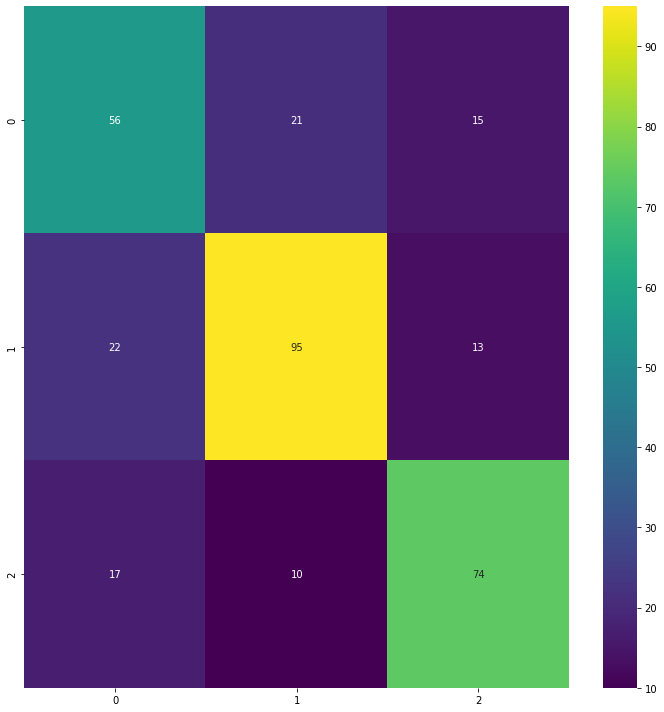

========== Random Forest ==========

Accuracy on validation set: 0.7988

Classification report : 
               precision    recall  f1-score   support

           0       0.68      0.79      0.73        92
           1       0.87      0.75      0.80       130
           2       0.85      0.87      0.86       101

    accuracy                           0.80       323
   macro avg       0.80      0.80      0.80       323
weighted avg       0.81      0.80      0.80       323


Confusion Matrix : 
 [[73 12  7]
 [25 97  8]
 [10  3 88]]


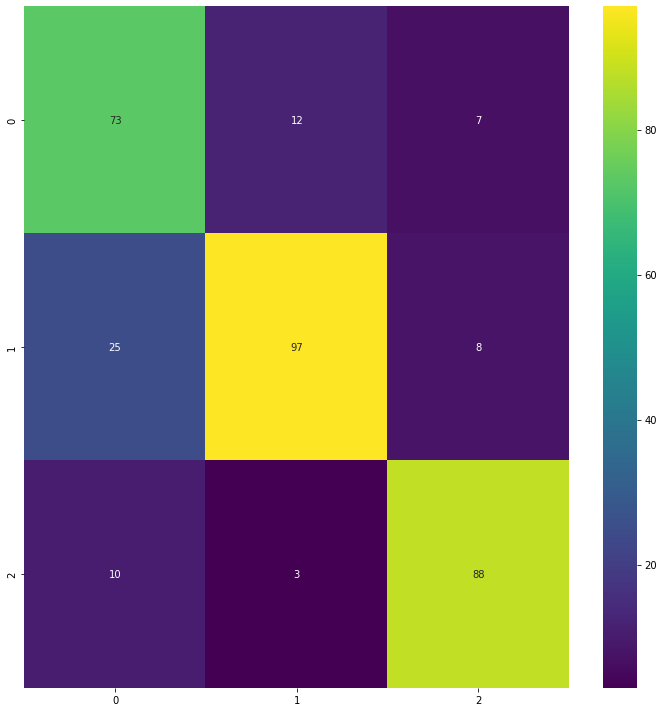

========== KNN Classifier ==========

Accuracy on validation set: 0.4396

Classification report : 
               precision    recall  f1-score   support

           0       0.34      0.60      0.43        92
           1       0.44      0.27      0.33       130
           2       0.64      0.51      0.57       101

    accuracy                           0.44       323
   macro avg       0.47      0.46      0.45       323
weighted avg       0.47      0.44      0.44       323


Confusion Matrix : 
 [[55 27 10]
 [76 35 19]
 [31 18 52]]


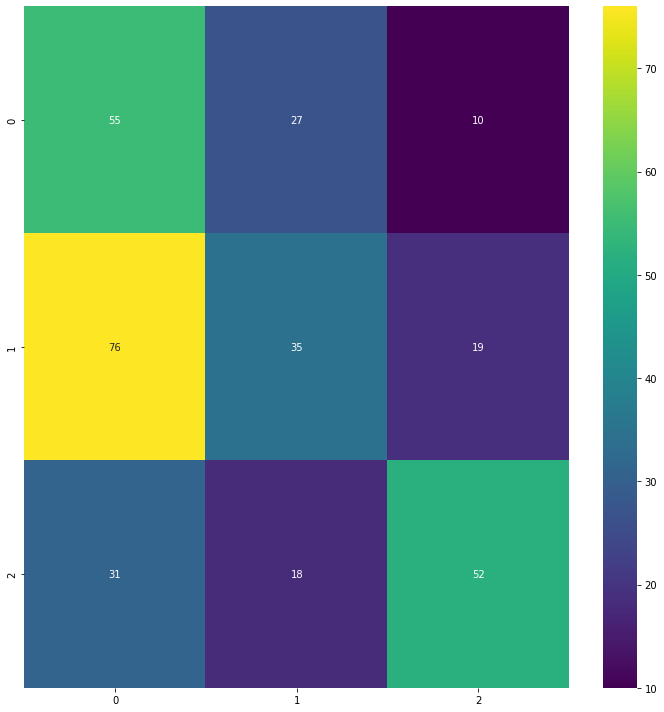

In [22]:


# For Decision tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
pred_dt = dt_model.predict(X_test)
result_dt = modelEvaluation(pred_dt, y_test, 'Decision tree')

# For Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)
result_rf = modelEvaluation(pred_rf, y_test, 'Random Forest')

# For KNN Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
pred_knn = knn_model.predict(X_test)
results_knn = modelEvaluation(pred_knn, y_test, 'KNN Classifier')

# Models Comparison table and graphs

In [23]:
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'Decision tree' : result_dt,
    'Random Forest' : result_rf,
    'KNN Classifier':results_knn
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))

+-----------+-----------------+-----------------+------------------+
| Metrics   |   Decision tree |   Random Forest |   KNN Classifier |
|-----------+-----------------+-----------------+------------------|
| accuracy  |        0.696594 |        0.798762 |         0.439628 |
| precision |        0.689644 |        0.798789 |         0.472994 |
| recall    |        0.690713 |        0.80364  |         0.460636 |
| f1-score  |        0.690061 |        0.798133 |         0.445944 |
+-----------+-----------------+-----------------+------------------+


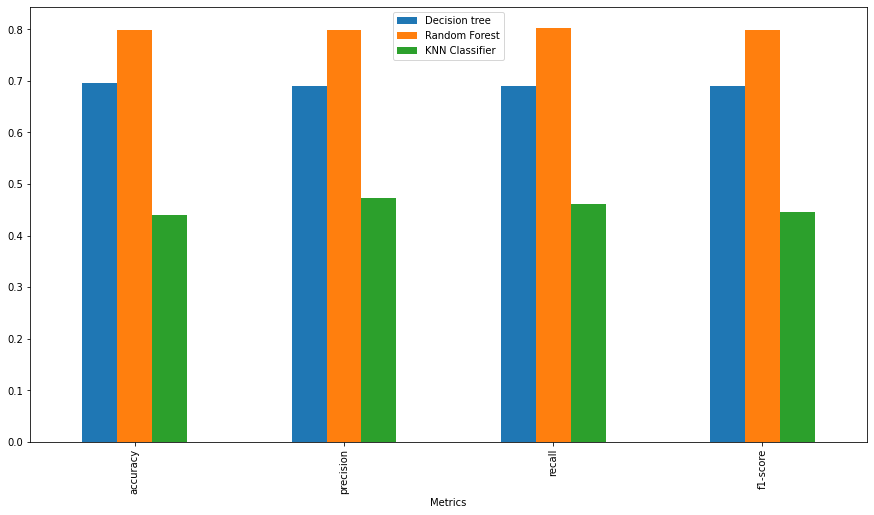

In [24]:
metrics_df.plot(kind='bar', figsize=(15,8))
plt.show()

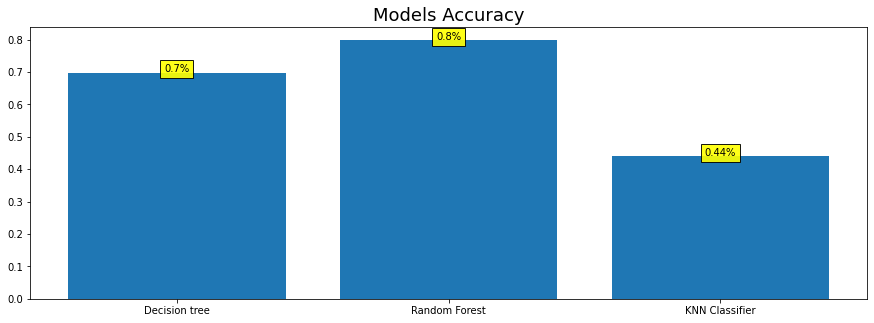

In [25]:
models_acc = metrics_df.iloc[0].tolist()
models_names = metrics_df.columns.tolist()
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],2),f"{round(acc[i],2)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()